<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 3.1 Simulaciones de Montecarlo </h3>
<h3 style="text-align: center;"> Ejercicios</h3>

Las **simulaciones de Montecarlo** consisten en el muestro repetitivo de las variables de entrada de un  modelo y la observación del conjunto de resultados obtenidos con esos muestreos. 

En general, en un proceso de simulación de Montecarlo, se siguen los siguientes pasos: 

- *Paso 1*: Definir la distribución de las variables aleatorias de entrada. 
- *Paso 2*: Generar muestreo aleatorio de esas entradas. 
- *Paso 3*: Realizar el cálculo computacional con cada una de las muestras de las variables de entrada.
- *Paso 4*: Agregar los resultados en un resultado final. 

### Ejercicio 1

Haciendo uso de las simulaciones de Montecarlo, aproximar el número $\pi$ con cuatro cifras decimales exactas. 

**Nota**: Para eso se representa el arco del círculo unidad que se encuentra en el intervalo $I=[0,1] \times [0,1]$ y se bombardea el intervalo con valores aleatorios dentro del intervalo $I$. El área del cuarto de círculo se aproxima por el número de puntos dentro del área sobre todos los puntos dentro del intervalo. O sea, 
$$A=\frac{\hbox{no. puntos dentro del área}}{\hbox{no. puntos en $I$}}= \frac{1}{4}\pi.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Text(0.5, 1.0, 'pi approx = 3.1404524')

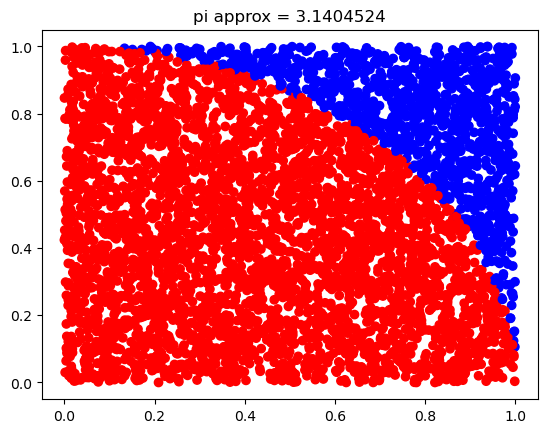

In [25]:
N = 10_000_000

x = st.uniform.rvs(size=N*2).reshape((N, 2))

l = (x**2).sum(axis=1)

pi = 4 * sum(l < 1) / N

plt.scatter(x[:5000,0], x[:5000,1], c=np.where(l[:5000]<1, 'r', 'b'))
plt.title(f"pi approx = {pi}")

In [8]:
xs = np.linspace(0, 1, 10_000_001)
ys = np.sqrt(1-xs**2)

np.trapezoid(ys,xs) * 4

np.float64(3.141592653552605)

### Ejercicio 2

Un célebre resultado matemático relacionado con las simulaciones de Montecarlo es el **Teorema Central del Límite**. Este indica que dada una muestra de $X_i$ variables independientes e idénticamente distribuidas con media $\mu$ y varianza $\sigma^2$ finita, con $i=1..n$ (e.g., $n$ simulaciones de Montecarlo de una variable aleatoria con varianza finita), entonces la media de esa muestra $\hat{\mu}= \frac{\sum_{i=1}^n X_i}{n}$ se distribuye de la siguiente manera: 

$$\hat{\mu}  \sim  N\left(\mu, \frac{\sigma}{\sqrt{n}} \right) \hbox{ cuando } n \rightarrow \infty.$$

Podemos comprobar este resultado con cualquier distribución aleatoria, tomando $m$ simulaciones de Montecarlo de la distribución, cada una de tamaño $n$. Elegir una distribución aleatoria y comprobar el Teorema Central del Límite para dos valores $n_1=100$ y $n_2=10000$, con $m=1000$.

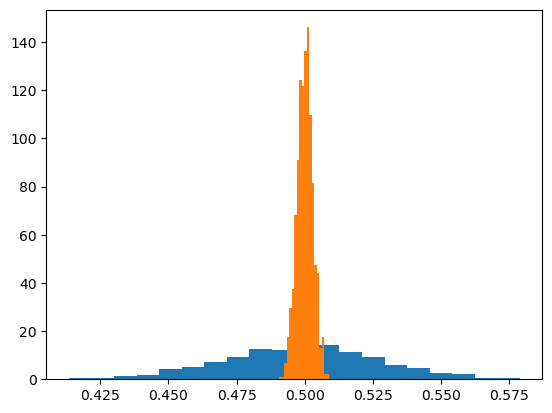

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n1 = 100
n2 = 10_000
m = 1_000

sims1 = st.uniform.rvs(size=m*n1).reshape((m, -1)).mean(axis=1)
sims2 = st.uniform.rvs(size=m*n2).reshape((m, -1)).mean(axis=1)

mu = st.uniform.mean()
sigma2 = st.uniform.var()
x = np.linspace(0, 1, 1001)

est1 = st.norm.pdf(x, mu, sigma2/np.sqrt(n1))
est2 = st.norm.pdf(x, mu, sigma2/np.sqrt(n2))

est1 = est1
est2 = est2

plt.hist(sims1, 20, density=True)
plt.hist(sims2, 20, density=True)

plt.show()

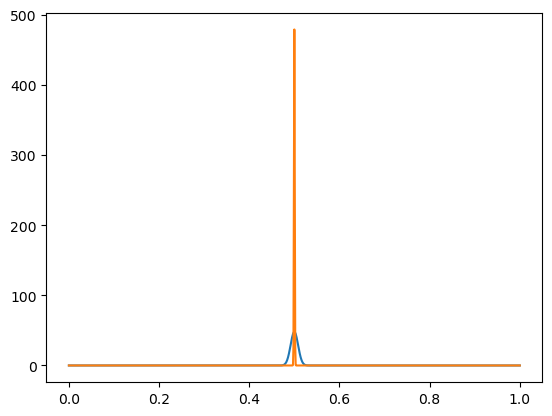

In [65]:
plt.plot(x, est1)
plt.plot(x, est2)

In [67]:
res1 = st.kstest(sims1, st.norm.cdf, (mu, sigma2/np.sqrt(n1)))
res2 = st.kstest(sims2, st.norm.cdf, (mu, sigma2/np.sqrt(n2)))

res1.pvalue, res2.pvalue

(np.float64(2.0642980337844634e-74), np.float64(2.153274801596223e-71))

### Ejercicio 3

Partimos del modelo *SIR* con una medida de inmunización. Entonces tenemos cuatro tipos de individuos, S (suceptibles), X (Infectados), R (Recuperados) e I (Inmunizados). En términos porcentuales, las ecuaciones del modelo serían las siguientes: 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x -\delta s \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x  \\
\frac{di}{dt} &= \delta s,\end{aligned}$$ 

donde los parámetros $\beta$, $\gamma$ y $\delta$ indican la tasa de contagio, la tasa de recuperación y la tasa de inmunización, respectivamente. La tasa de recuperación se define como $\gamma=1/T$, con $T$ el tiempo de duración de la enfermedad. 

**(a)** Tomamos un porcentaje de infectados inicial del 1%, y el resto son suceptibles. Asumimos incertidumbre en el valor de cada una de las tasas. La tasa de contagio sigue un normal con media 0.5 y desviación típica 0.1, o sea $\beta \sim N(0.5,0.1)$; el tiempo de duración de la enfermedad sigue una exponencial con media 5 días, o sea, $T \sim exp(1/5)$; y la tasa de inmunización sigue una normal $\delta \sim N(0.05, 0.02)$. Representar la **distribución de probabilidad del número máximo de infectados** y calcular la **probabilidad de que el número máximo de infectados sea mayor que 0.1**. Encontrar la **tasa media de inmunización para que esta probabilidad sea inferior al 5%**.

**(b)** Realizar un análisis de sensibilidad para cada uno de los parámetros. Para ello realizar simulaciones de Montecarlo del modelo y calcular el coeficiente de regresión lineal entre el número máximo de los infectados y cada uno de los parámetros. Indicar **un valor numérico de sensibilidad para cada uno de los tres parámetros del modelo**.  

In [7]:
def sirv(beta, gamma, delta):
    def f(x, _t):
        s = x[0]
        i = x[1]
        ds = -beta*s*i - delta*s
        di = beta*s*i - gamma*i
        dr = gamma*i
        dv = delta*s
        return np.array([ds, di, dr, dv])
    return f

In [8]:
def solve_rk(model, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = model(x[i], t[i])
        k2 = model(x[i]+dt*k1/2, t[i]+dt/2)
        k3 = model(x[i]+dt*k2/2, t[i]+dt/2)
        k4 = model(x[i]+dt*k3, t[i]+dt)
        x[i+1] = x[i] + dt/6 * (k1+2*k2+2*k3+k4) 
    return x

In [54]:
from tqdm.notebook import tqdm
t = np.linspace(0, 100, 201)
N = 300

x0 = np.array([0.99, 0.01, 0, 0])

beta_mu = 0.5
beta_sigma = 0.1

xs = np.zeros((N, len(t), len(x0)))
for i in tqdm(range(N)):
    beta = st.norm.rvs(beta_mu, beta_sigma)
    T = st.expon.rvs(loc=1, scale=4)
    gamma = 1/T
    delta = st.norm.rvs(0.05, 0.02)

    xs[i] = solve_rk(sirv(beta, gamma, delta), x0, t)

  0%|          | 0/300 [00:00<?, ?it/s]

In [55]:
max_infected = xs[:,:,1].max(axis=1)

freq, bin = np.histogram(max_infected, bins=50)
midpoints = (bin[:-1] + bin[1:]) / 2

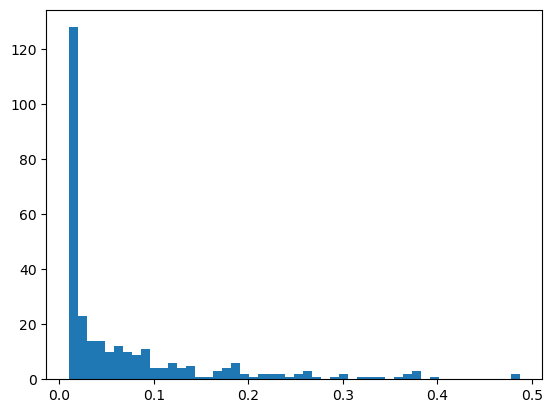

In [59]:
plt.bar(midpoints, freq, midpoints[1]-midpoints[0])
plt.show()

In [57]:
higher_chance = (max_infected > 0.1).mean()

print(f"probabilidad de que sea mayor que 10% de infectados: {higher_chance:.3f}")

probabilidad de que sea mayor que 10% de infectados: 0.227


In [58]:
from tqdm.notebook import tqdm
delta_mu_space = np.linspace(0.05, 0.25, 11)
N = 500

ress = np.zeros((len(delta_mu_space), N, len(t), len(x0)))

for j, delta_mu in tqdm(enumerate(delta_mu_space), total=len(delta_mu_space)):
    for i in tqdm(range(N), leave=False):
        beta = st.norm.rvs(0.5, 0.1)
        T = st.expon.rvs(loc=1, scale=4)
        gamma = 1/T
        delta = st.norm.rvs(delta_mu, 0.02)

        ress[j, i] = solve_rk(sirv(beta, gamma, delta), x0, t)


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [60]:
max_infected = ress[:, :, :,  1].max(axis=(2))
probs = (max_infected > 0.1).mean(axis=1)
probs

array([0.292, 0.172, 0.106, 0.058, 0.038, 0.016, 0.016, 0.004, 0.   ,
       0.   , 0.   ])

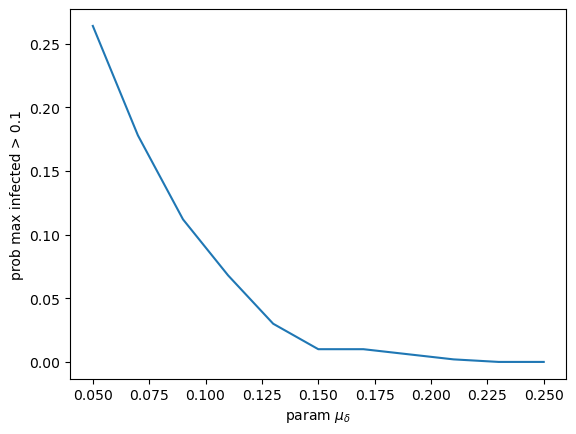

In [48]:
plt.plot(delta_mu_space, probs)
plt.xlabel(r"param $\mu_\delta$")
plt.ylabel("prob max infected > 0.1")
plt.show()

In [ ]:
required_mu = np.interp(0.05, probs[::-1], delta_mu_space[::-1])

print(f"mu para menos de 5% que haya mas de 10% de población infectada: {required_mu:.4f}")

mu para menos de 5% que haya mas de 10% de población infectada: 0.1195


In [123]:
N = 1000

sensibility_xs = np.zeros((N, len(t), len(x0)))
sensibility_params = np.zeros((N, 3))

for i in tqdm(range(N)):
    beta = st.norm.rvs(0.5, 0.1)
    T = st.expon.rvs(loc=1, scale=4)
    gamma = 1/T
    delta = st.norm.rvs(0.05, 0.02)

    sensibility_params[i] = np.array([beta, gamma, delta])
    sensibility_xs[i] = solve_rk(sirv(beta, gamma, delta), x0, t)

sen_beta = sensibility_params[:,0]
sen_gamma = sensibility_params[:,1]
sen_delta = sensibility_params[:,2]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [124]:
max_infected = sensibility_xs[:,:,1].max(axis=1)
max_infected.shape

(1000,)

In [125]:
beta_reg = st.linregress(sen_beta, max_infected)
gamma_reg = st.linregress(sen_gamma, max_infected)
delta_reg = st.linregress(sen_delta, max_infected)

print(f"beta:  slope={beta_reg.slope: .4f}, r={beta_reg.rvalue: .4f}")
print(f"gamma: slope={gamma_reg.slope: .4f}, r={gamma_reg.rvalue: .4f}")
print(f"delta: slope={delta_reg.slope: .4f}, r={delta_reg.rvalue: .4f}")

beta:  slope= 0.2789, r= 0.2859
gamma: slope=-0.2461, r=-0.5996
delta: slope=-1.2389, r=-0.2540


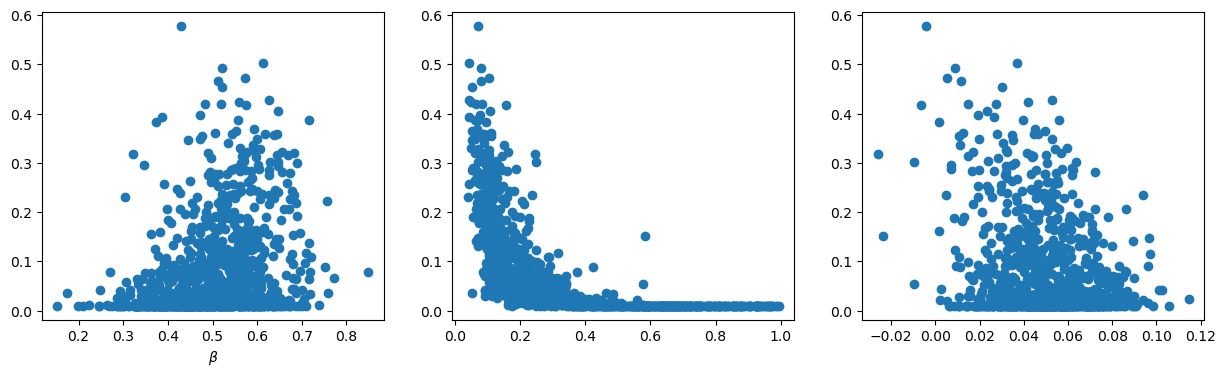

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
ax1.scatter(sen_beta, max_infected)
ax1.set_xlabel("$\\beta$")
ax1.set_title("$\\beta$ param")
ax2.scatter(sen_gamma, max_infected)
ax3.scatter(sen_delta, max_infected)

In [129]:
import statsmodels.api as sm
import pandas as pd

params = pd.DataFrame({'beta':sen_beta, 'gamma':sen_gamma, 'delta': sen_delta})
params_const = sm.add_constant(params)
model = sm.OLS(max_infected, params_const)
res = model.fit()

$$
    x^\star = c_0 + c_1 \beta + c_2 \gamma + c_3 \delta + \epsilon
$$

In [130]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     337.9
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          2.58e-151
Time:                        17:36:26   Log-Likelihood:                 1263.3
No. Observations:                1000   AIC:                            -2519.
Df Residuals:                     996   BIC:                            -2499.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1035      0.013      8.003      0.000       0.078       0.129
beta           0.2512      0.022     11.534      0.000       0.208       0.294
gamma         -0.2461      0.009    -26.821      0.000      -0.264      -0.228
delta         -1.3686      0.109    -12.568      0.000      -1.582      -1.155
==============================================================================
Omnibus:                      256.698   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.363
Skew:                           1.391   Prob(JB):                    1.05e-128
Kurtosis:                       5.531   Cond. No.                         59.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""